In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
dir = 'UEyes-DS/part2_Roboflow/'
finaldir = 'UEyes-DS/part2_RoboflowToSAM/'
n = len(dir)

In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)


In [9]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "SAM/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

Current file: UEyes-DS/part2_Roboflow/01ca85_jpg.rf.f52dd3682b152643e79366dd93315661.jpg
Segmentation to: UEyes-DS/part2_RoboflowToSAM/01ca85_jpg.rf.f52dd3682b152643e79366dd93315661.jpg
toapp: {}
toapp: {}
toapp: {'area': 34935}
toapp: {'area': 34935, 'bbox': [17, 374, 506, 69]}
toapp: {'area': 34935, 'bbox': [17, 374, 506, 69], 'predicted_iou': 1.0220680236816406}
toapp: {'area': 34935, 'bbox': [17, 374, 506, 69], 'predicted_iou': 1.0220680236816406, 'point_coords': [[25.3125, 405.0]]}
toapp: {'area': 34935, 'bbox': [17, 374, 506, 69], 'predicted_iou': 1.0220680236816406, 'point_coords': [[25.3125, 405.0]], 'stability_score': 0.9923929572105408}
toapp: {}
toapp: {}
toapp: {'area': 34921}
toapp: {'area': 34921, 'bbox': [17, 458, 506, 68]}
toapp: {'area': 34921, 'bbox': [17, 458, 506, 68], 'predicted_iou': 1.0197210311889648}
toapp: {'area': 34921, 'bbox': [17, 458, 506, 68], 'predicted_iou': 1.0197210311889648, 'point_coords': [[480.9375, 525.0]]}
toapp: {'area': 34921, 'bbox': [17, 45

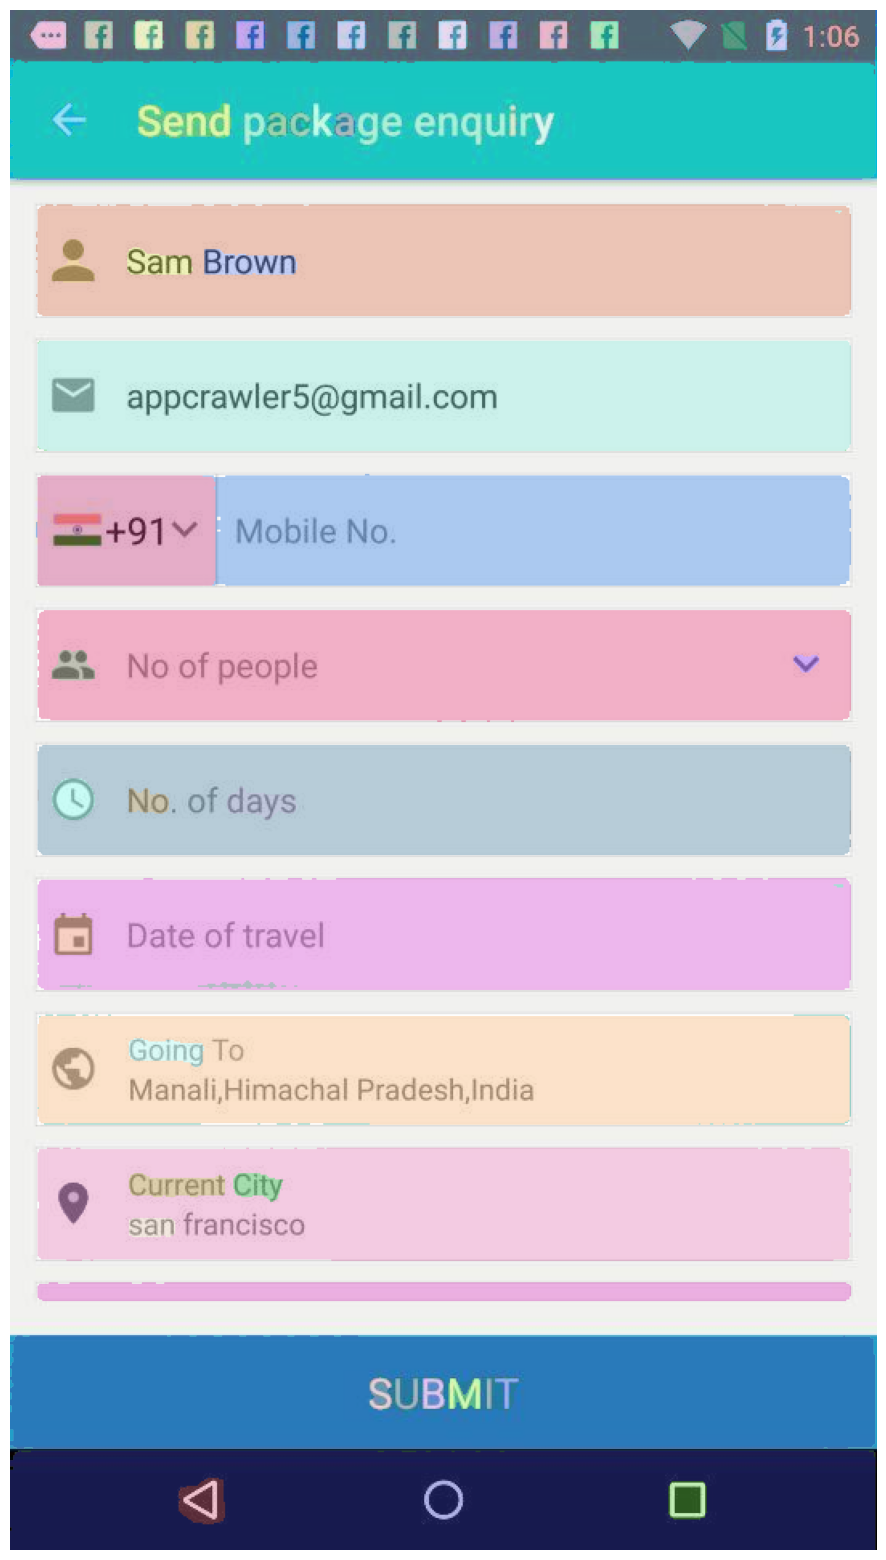

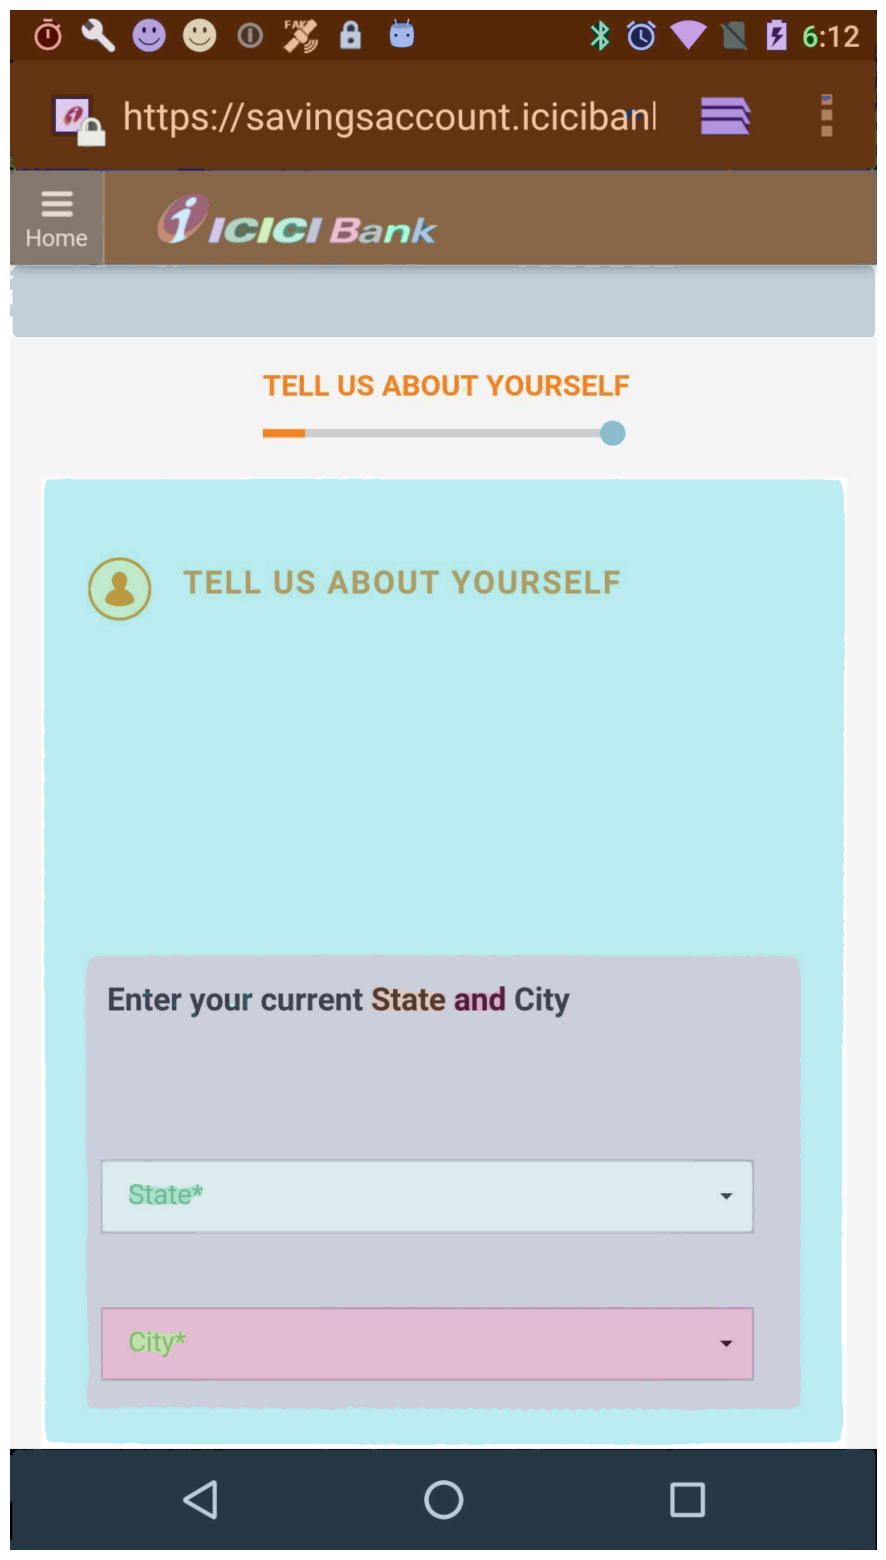

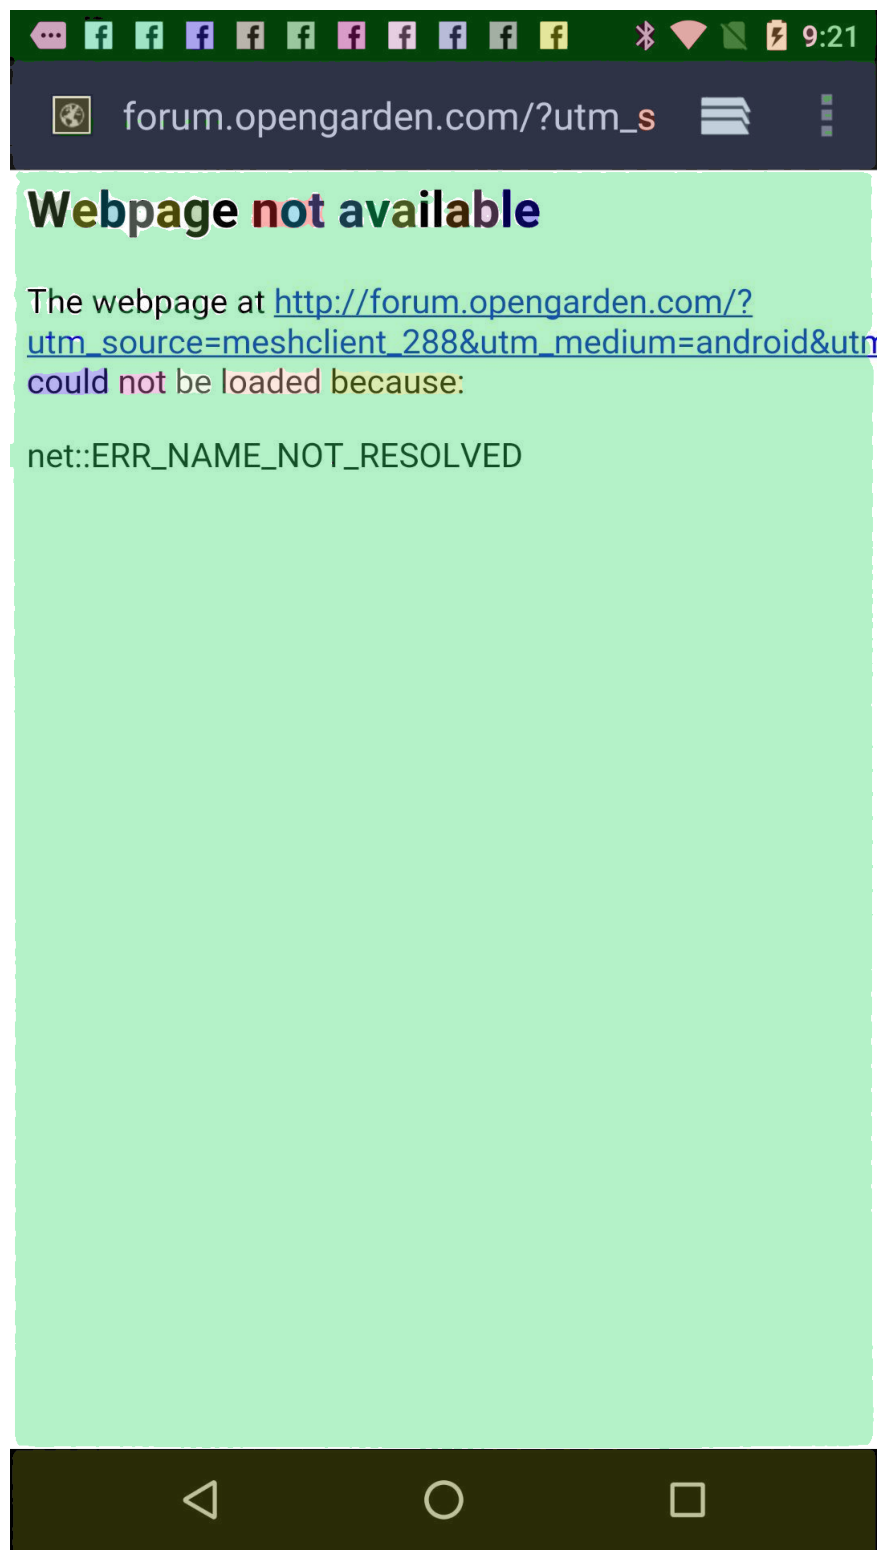

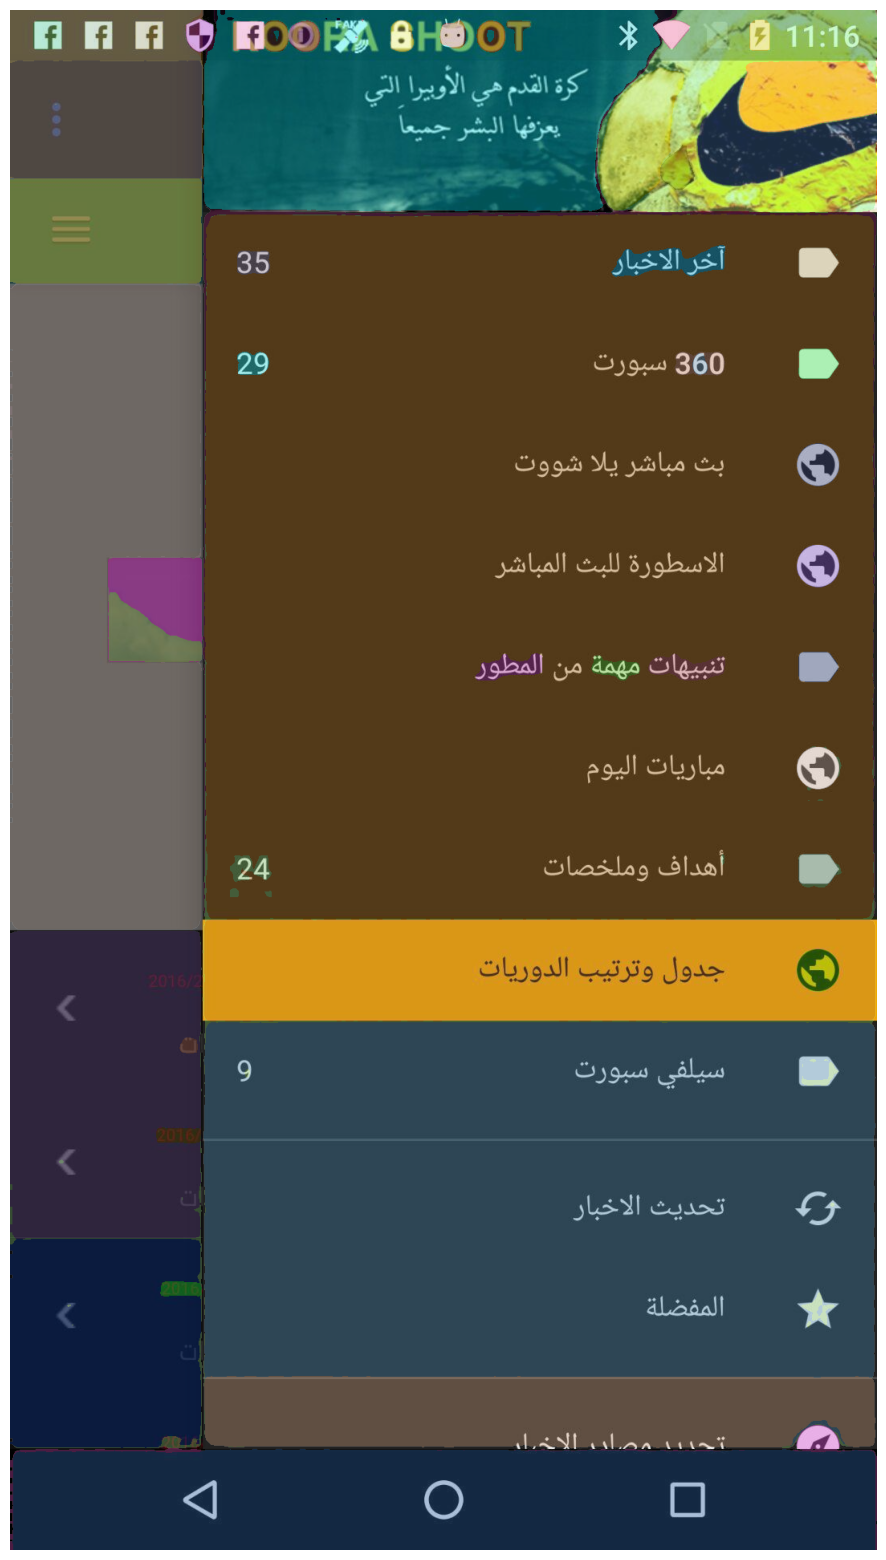

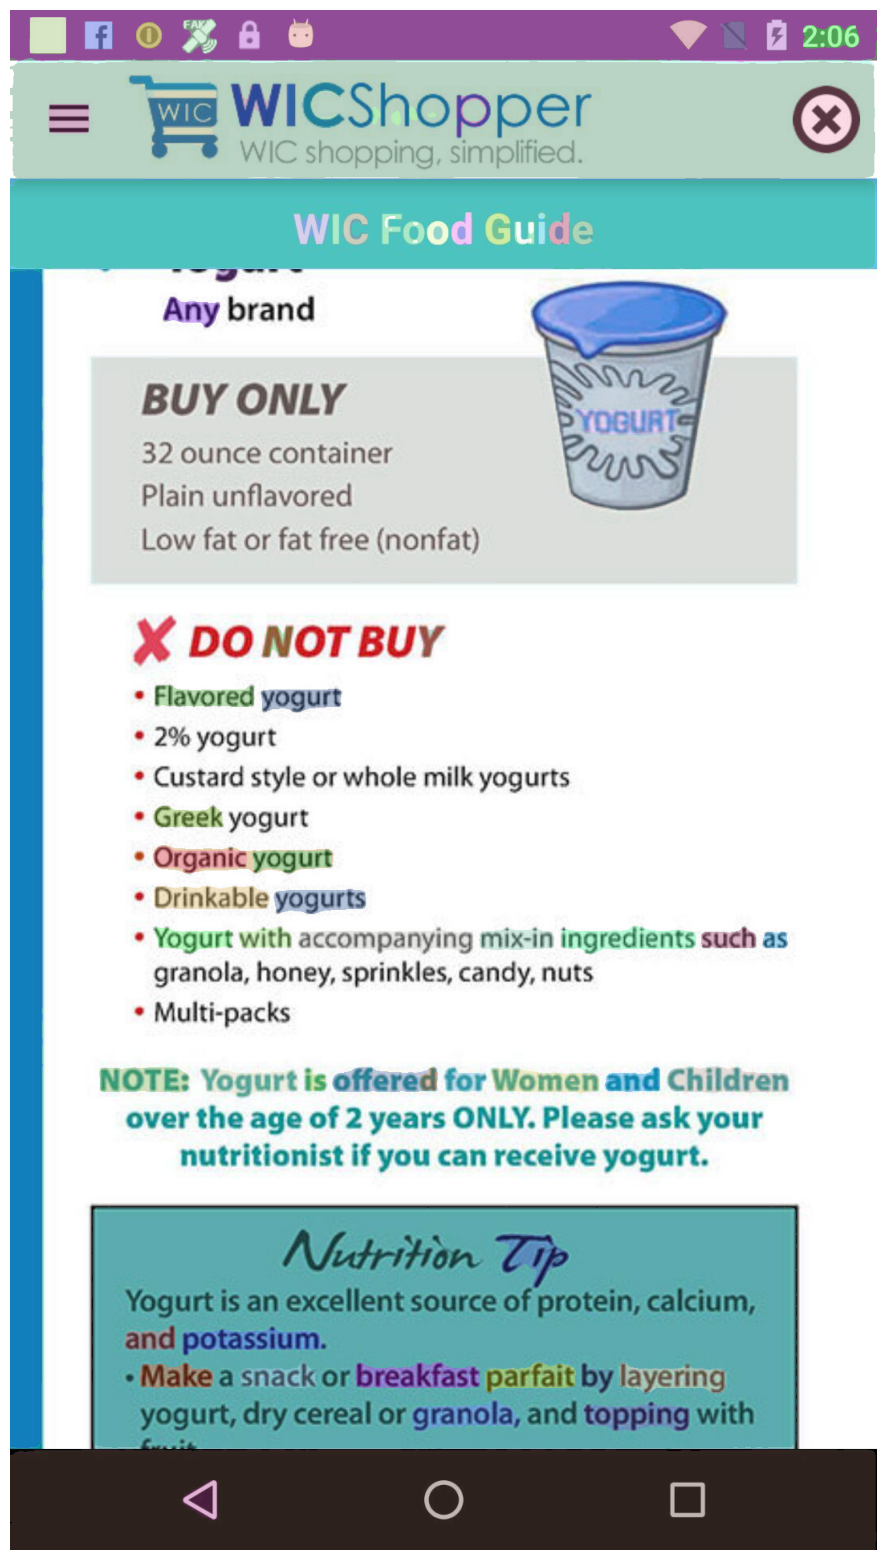

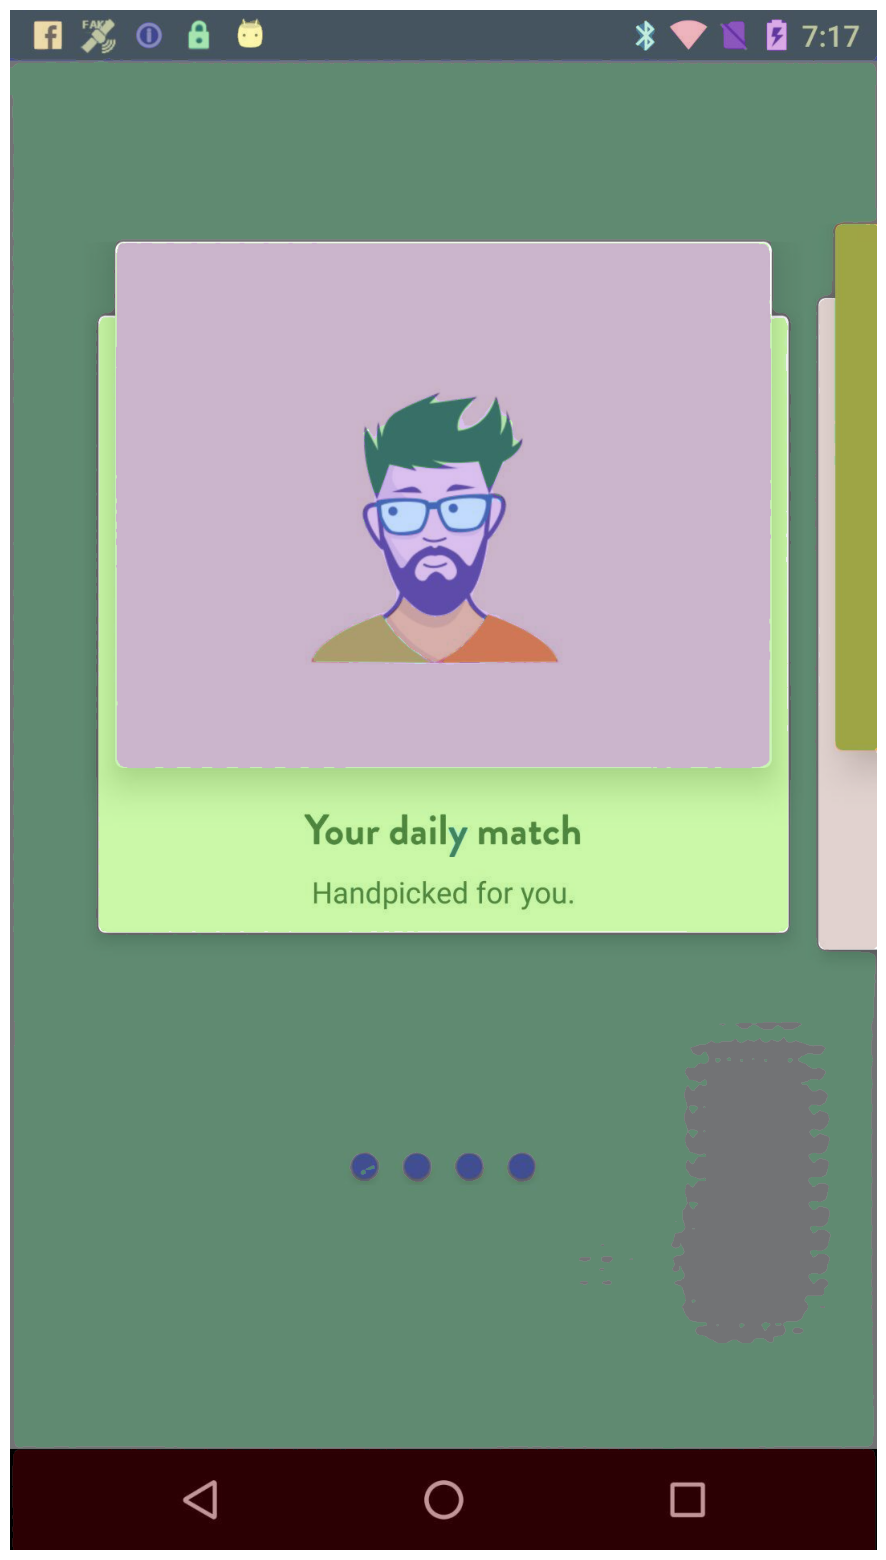

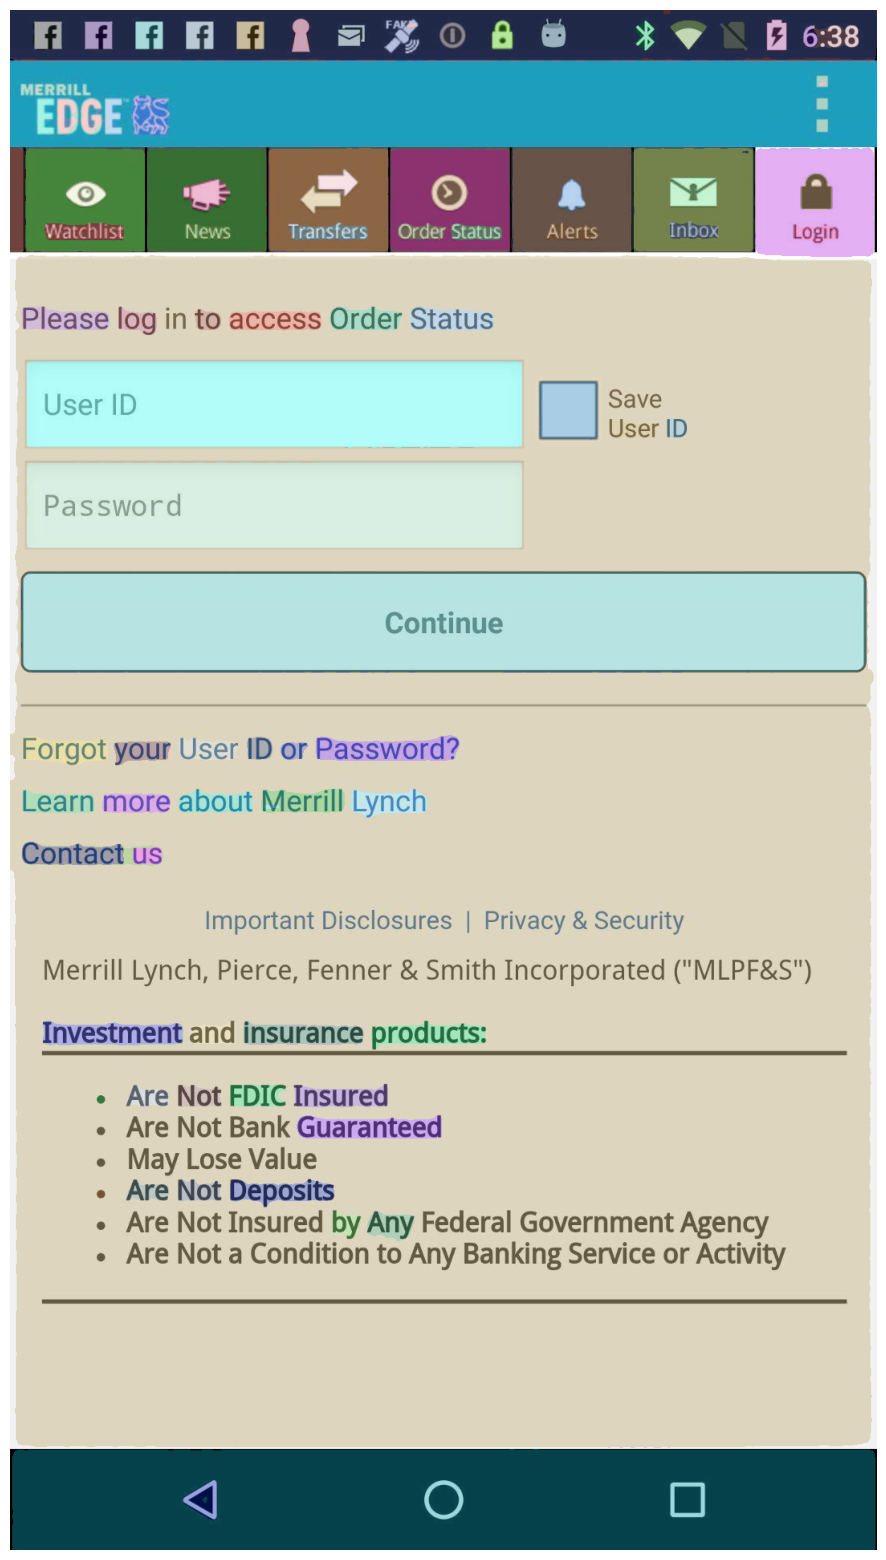

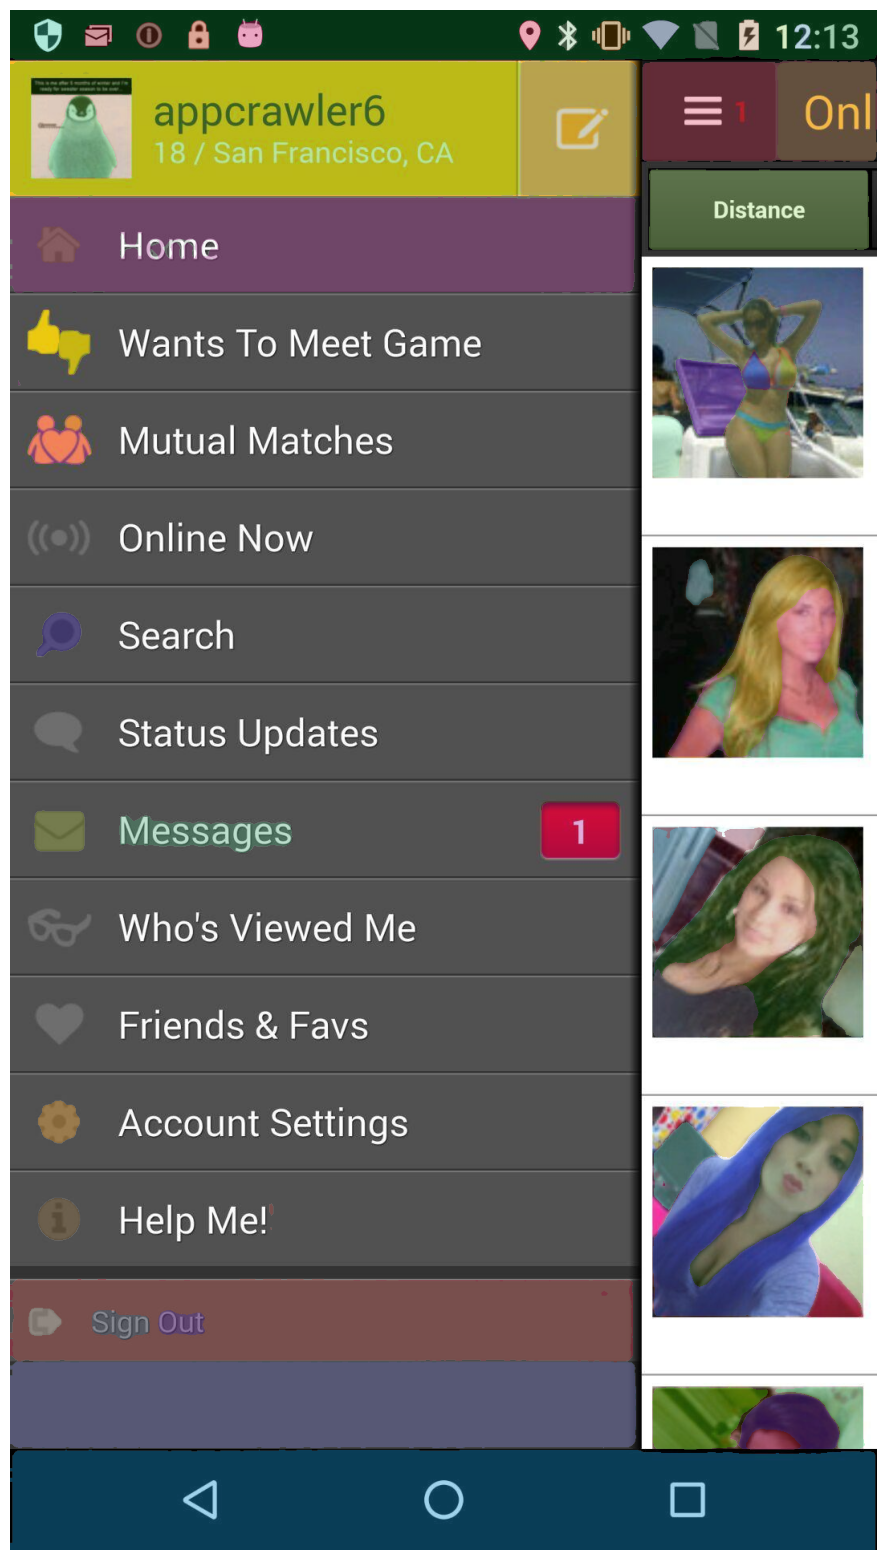

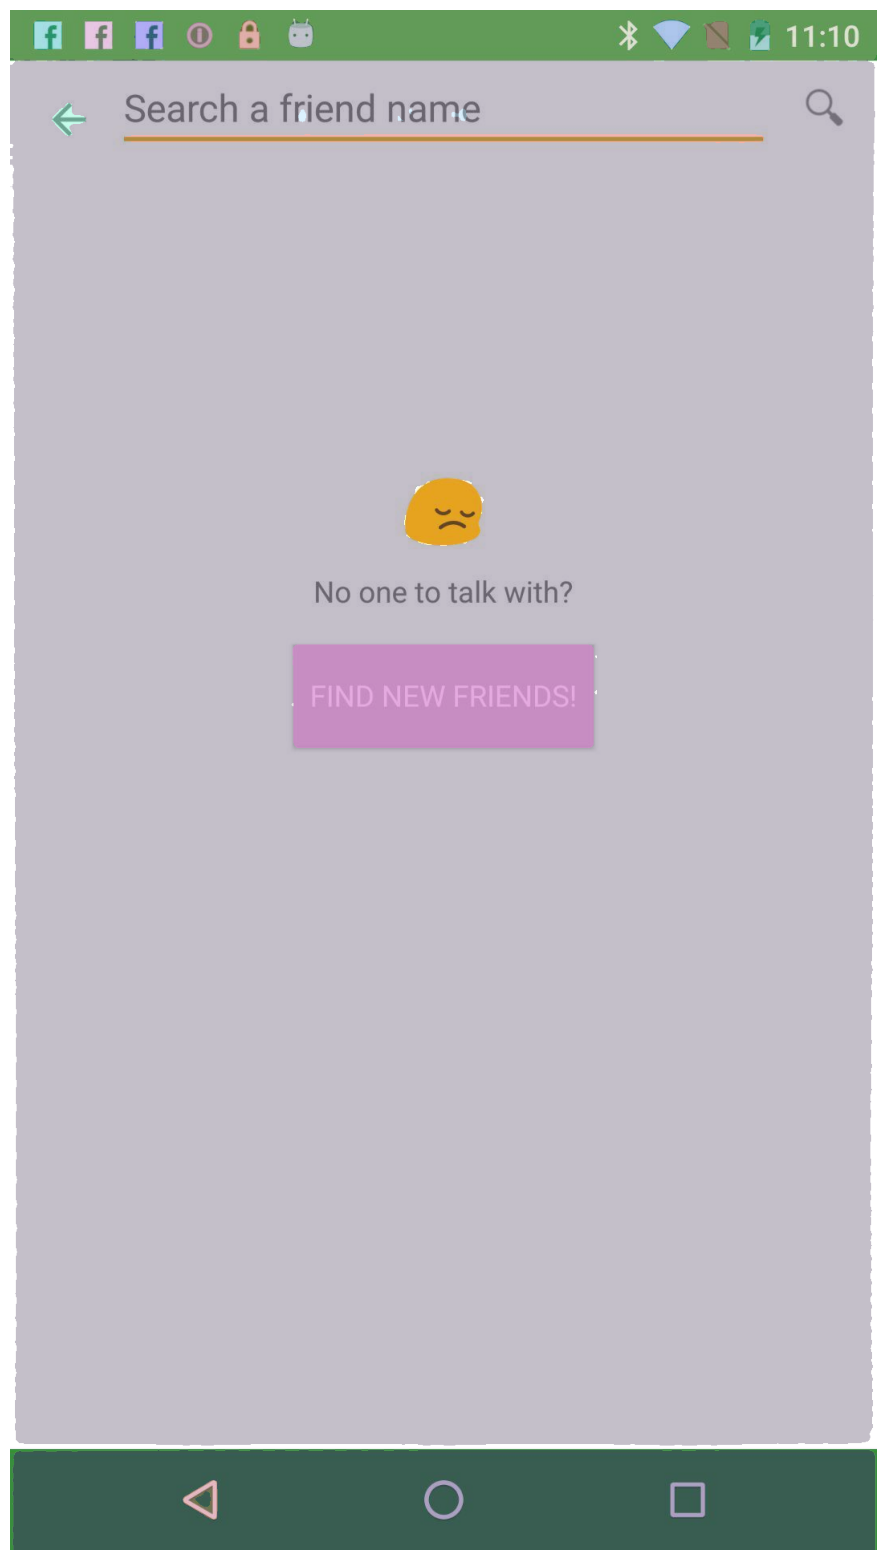

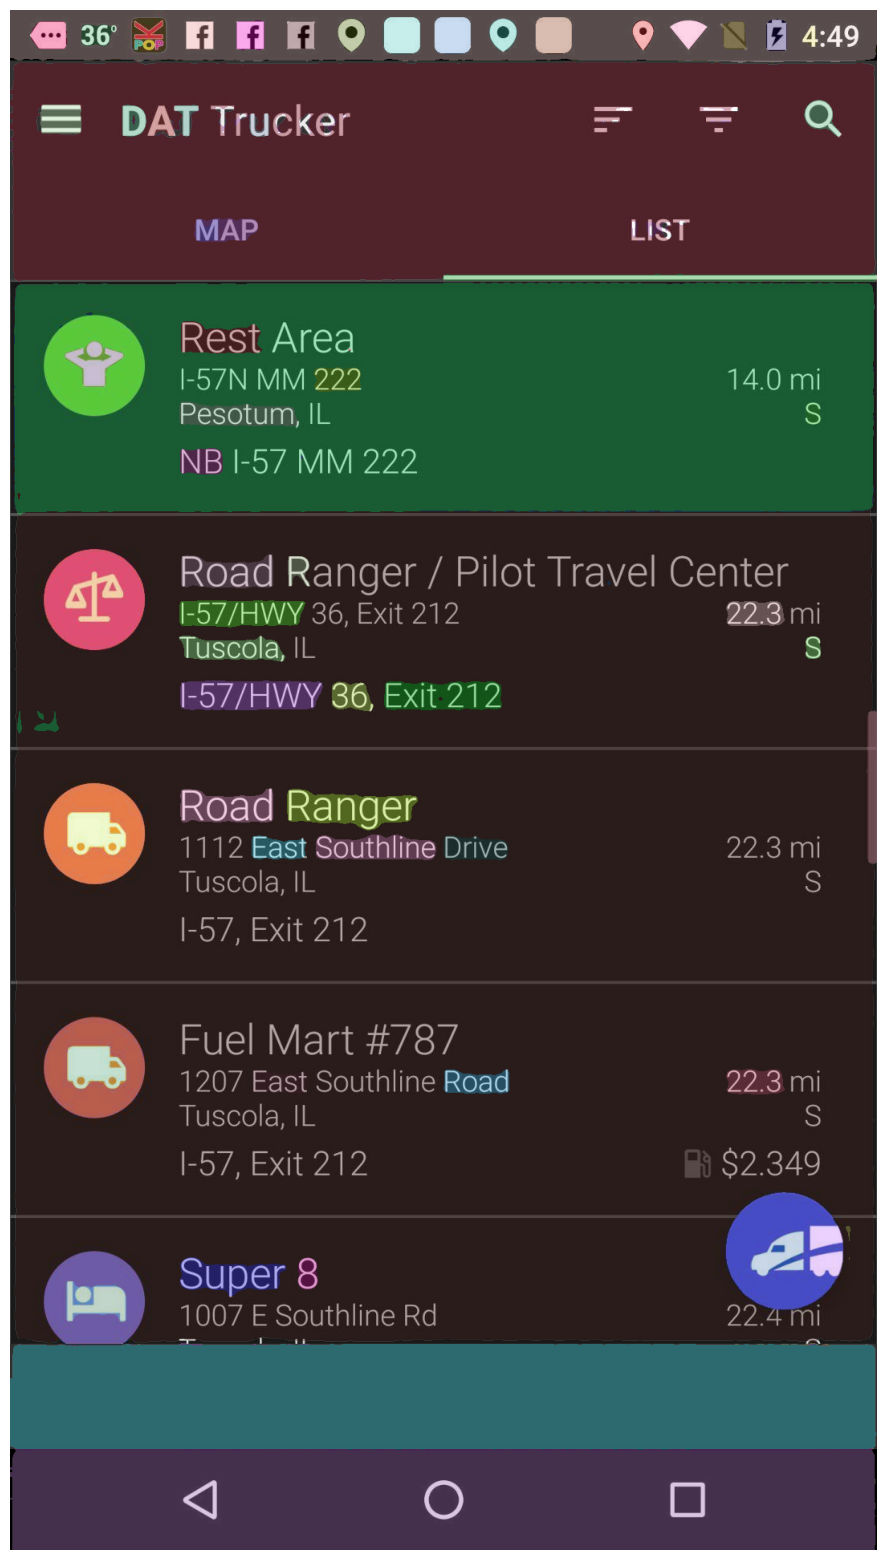

In [12]:
import codecs, json

masks2 = {}


for file in os.scandir(dir):
    
    
    print("Current file: " + file.path)
    print("Segmentation to: " + finaldir + file.path[n:])
    
    image = cv2.imread(file.path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks = mask_generator.generate(image)
    
    seglist = []

    for i in range(len(masks)):
        toapp = {}
        for key in masks[i].keys():
            print("toapp: " + str(toapp))
            if key != 'segmentation':
                toapp[key] = masks[i][key]
        seglist.append(toapp)
                
    masks2[file.path[n:]] = seglist
    
    print(seglist)
        
    # ndarray for individual elts
    
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    plt.savefig(finaldir + file.path[n:], bbox_inches='tight', pad_inches=0)
    
json.dump(masks2, codecs.open("sam_annotations.json", 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)
    

In [ ]:
json.dump(masks2, codecs.open(finaldir + "sam_annotations.json", 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

In [11]:
print(toapp)

{'area': 1831, 'bbox': [224, 851, 93, 22], 'predicted_iou': 0.8815233707427979, 'point_coords': [[278.4375, 855.0]], 'stability_score': 0.9536247253417969, 'crop_box': [0, 0, 540, 960]}


In [13]:
print(masks2["01ca85_jpg.rf.f52dd3682b152643e79366dd93315661.jpg"])

[{'area': 34935, 'bbox': [17, 374, 506, 69], 'predicted_iou': 1.0220680236816406, 'point_coords': [[25.3125, 405.0]], 'stability_score': 0.9923929572105408, 'crop_box': [0, 0, 540, 960]}, {'area': 34921, 'bbox': [17, 458, 506, 68], 'predicted_iou': 1.0197210311889648, 'point_coords': [[480.9375, 525.0]], 'stability_score': 0.9971113204956055, 'crop_box': [0, 0, 540, 960]}, {'area': 34923, 'bbox': [16, 289, 507, 69], 'predicted_iou': 1.018571138381958, 'point_coords': [[109.6875, 315.0]], 'stability_score': 0.9885566830635071, 'crop_box': [0, 0, 540, 960]}, {'area': 33325, 'bbox': [0, 898, 538, 61], 'predicted_iou': 1.0157471895217896, 'point_coords': [[126.5625, 945.0]], 'stability_score': 0.9742409586906433, 'crop_box': [0, 0, 540, 960]}, {'area': 35573, 'bbox': [17, 709, 506, 70], 'predicted_iou': 1.0136433839797974, 'point_coords': [[177.1875, 735.0]], 'stability_score': 0.9863338470458984, 'crop_box': [0, 0, 540, 960]}, {'area': 34110, 'bbox': [17, 627, 505, 67], 'predicted_iou': 1

In [ ]:
masks2 = {}

seglist = []

for i in range(len(masks)):
    toapp = {}
    for key in masks[i].keys():
        if key != 'segmentation':
            toapp[key] = masks[i][key]
    seglist.append(toapp)
            

masks2[file.path[n:]] = seglist

print(masks2["01e2cd_jpg.rf.40328baf70ed7f176a45cd90e0263ac8.jpg"][63])

{'area': 1831, 'bbox': [224, 851, 93, 22], 'predicted_iou': 0.8815233707427979, 'point_coords': [[278.4375, 855.0]], 'stability_score': 0.9536247253417969, 'crop_box': [0, 0, 540, 960]}


In [ ]:
print(masks[0])

{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 34935, 'bbox': [17, 374, 506, 69], 'predicted_iou': 1.0220680236816406, 'point_coords': [[25.3125, 405.0]], 'stability_score': 0.9923929572105408, 'crop_box': [0, 0, 540, 960]}
